<a href="https://colab.research.google.com/github/vamsikartik01/Machine-Learning/blob/main/KNearestNeibhours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
pwd

'/content'

In [ ]:
cd drive/My Drive/Datasets

/content/drive/My Drive/Datasets


In [ ]:
pwd

'/content/drive/My Drive/Datasets'

In [ ]:
file_name = "fruit_data_with_colors.txt"

In [ ]:
df = pd.read_csv(file_name, sep='\t')

In [ ]:
df.tail(10)

,fruit_label,fruit_name,mass,width,height,color_score
49,4,lemon,132,5.8,8.7,0.73
50,4,lemon,130,6.0,8.2,0.71
51,4,lemon,116,6.0,7.5,0.72
52,4,lemon,118,5.9,8.0,0.72
53,4,lemon,120,6.0,8.4,0.74
54,4,lemon,116,6.1,8.5,0.71
55,4,lemon,116,6.3,7.7,0.72
56,4,lemon,116,5.9,8.1,0.73
57,4,lemon,152,6.5,8.5,0.72
58,4,lemon,118,6.1,8.1,0.70


In [ ]:
print(df.fruit_label.unique())
print(df.fruit_name.unique())

[1 2 3 4]
['apple' 'mandarin' 'orange' 'lemon']


In [ ]:
name_pred = dict(zip(df.fruit_label.unique(),df.fruit_name.unique()))

print(name_pred[1],name_pred[2],name_pred[3],name_pred[4])


apple mandarin orange lemon


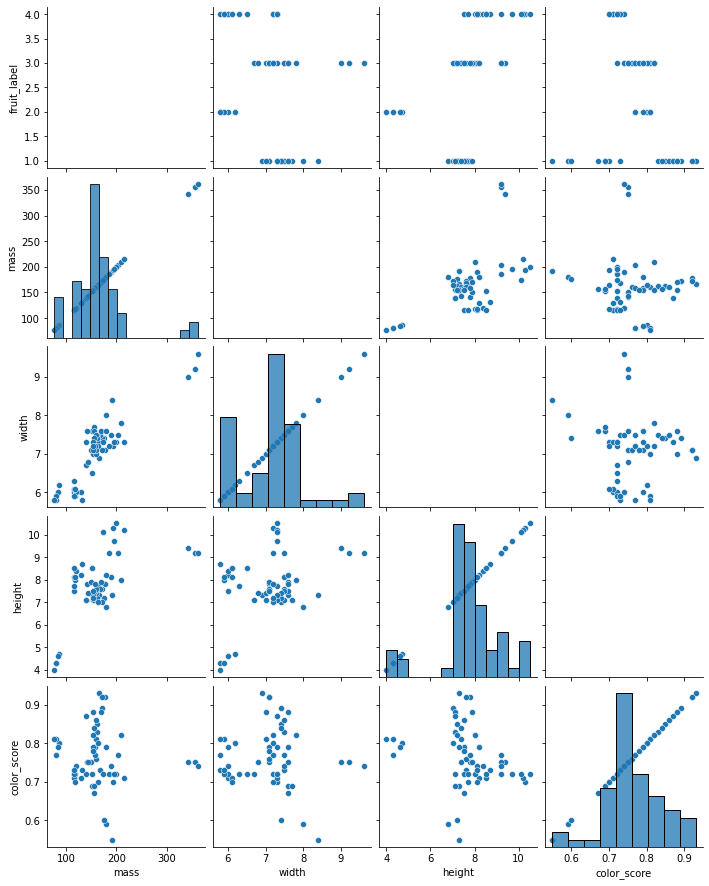

In [ ]:
sns.pairplot(df, x_vars=['mass','width','height','color_score'])

In [ ]:
df = df.drop('fruit_subtype',axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df.drop(['fruit_label','fruit_name'], axis=1))
df_scd = scaler.transform(df.drop(['fruit_label','fruit_name'],axis=1))

df_scaled = pd.DataFrame(df_scd,columns=df.columns[2:])
df_scaled.head()

,mass,width,height,color_score
0,0.529442,1.598690,-0.291397,-2.793595
1,0.309462,1.104854,-0.661922,-2.268684
2,0.236136,0.364100,-0.365502,-2.137456
3,-1.413709,-1.117409,-2.218131,0.487100
4,-1.450372,-1.364327,-2.292236,0.355872


In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df_scaled, df.fruit_label,test_size=0.3)

In [ ]:
print(df_scaled.shape)
print(x_train.shape)
print(x_test.shape)

(59, 4)
(41, 4)
(18, 4)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN = KNeighborsClassifier(n_neighbors=1)
KNN.fit(x_train,y_train)
preds = KNN.predict(x_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report 

In [ ]:
print(confusion_matrix(y_test,preds))
print(classification_report(y_test,preds))

[[4 0 0 0]
 [0 4 0 0]
 [0 0 5 0]
 [0 0 0 5]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5

    accuracy                           1.00        18
   macro avg       1.00      1.00      1.00        18
weighted avg       1.00      1.00      1.00        18



In [ ]:
error_rate = []
for i in range(1,10):
  knn1 = KNeighborsClassifier(n_neighbors=i)
  knn1.fit(x_train,y_train)
  preds1 = knn1.predict(x_test)
  error_rate.append(np.mean(preds1 != y_test))

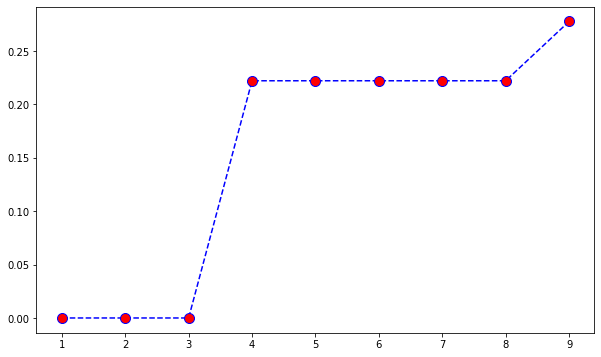

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,10),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)


In [ ]:
from sklearn.metrics import accuracy_score

print("AccuracyScore: ",accuracy_score(y_test, preds))

AccuracyScore:  1.0


In [ ]:
#prediction 1
massp = input("enter the mass:")
widthp = input("enter the width:")
heightp = input("enter the height:")
color_scorep = input("enter the color_score:")
arr = [[massp, widthp, heightp, color_scorep]]
arr_s = scaler.transform(arr)
predp = KNN.predict(arr_s)
print(name_pred[predp[0]])

enter the mass:116
enter the width:6
enter the height:7.5
enter the color_score:0.72
lemon
